In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('data_train.csv')


In [3]:
#data.workclass = data.workclass.where(data.workclass != "?").fillna(data.workclass.mode())
#data.occupation = data.occupation.where(data.occupation != "?").fillna(data.occupation.mode())
data= data.where(data != "?").fillna(np.nan)
data.occupation = data.occupation.where(data.occupation != "?").fillna(np.nan)
data.where(data == "?").count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

In [4]:
y_train = data['>50K,<=50K']
x_train = data.drop(['>50K,<=50K'],axis=1)

In [5]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [6]:
x_remake = pd.DataFrame(enc.fit_transform(x_train[['workclass','education','marital-status','occupation','relationship','race','sex']]))
x_train = x_train.drop(['workclass','education','marital-status','occupation','relationship','race','sex'],axis= 1)
x_train = x_train.join(x_remake)
x_train

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,0,1,2,3,...,50,51,52,53,54,55,56,57,58,59
0,34,284843,9,594,0,60,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,40,190290,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,36,177858,13,0,0,40,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,22,184756,10,0,0,30,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,47,149700,13,15024,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,18,395567,9,0,0,40,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14730,62,94931,11,3411,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14731,34,261023,10,0,1651,38,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14732,26,195327,9,0,0,40,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [7]:
y_train

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4         >50K
         ...  
14729    <=50K
14730    <=50K
14731    <=50K
14732    <=50K
14733    <=50K
Name: >50K,<=50K, Length: 14734, dtype: object

In [8]:
y_train = y_train.where(y_train != "<=50K").fillna(0)
y_train = y_train.where(y_train != ">50K").fillna(1)
y_train

0        0
1        0
2        0
3        0
4        1
        ..
14729    0
14730    0
14731    0
14732    0
14733    0
Name: >50K,<=50K, Length: 14734, dtype: int64

In [9]:
###make it more diffrent
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train.values,y_train.values,shuffle=True,test_size=0.3)


In [10]:
depths = np.arange(3, 20)
depths_for_forest = []
for i in depths:
    forest =  RandomForestClassifier(max_depth=i,n_estimators=100)
    depths_for_forest.append(cross_val_score(forest,x_val,y_val,n_jobs=-1,cv=3))

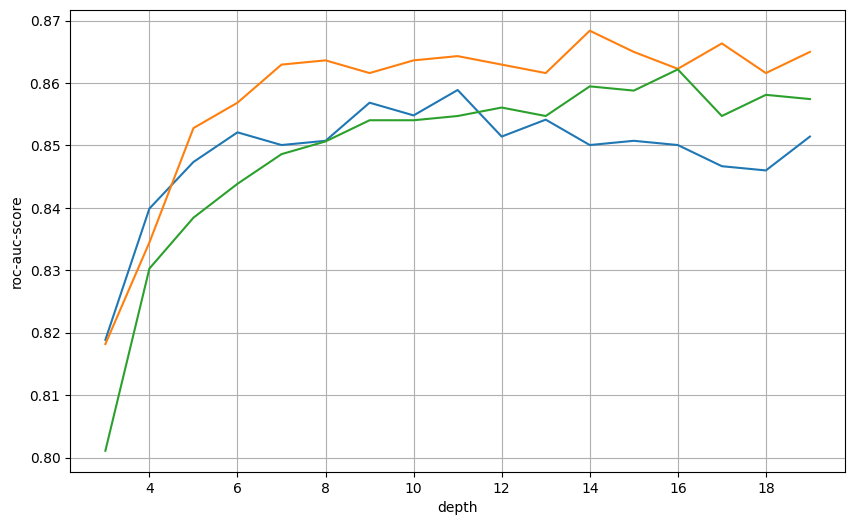

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 20), depths_for_forest)
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()

In [12]:
#the best depth is 14


In [13]:
forest = RandomForestClassifier(n_estimators=100,max_depth=14)
forest.fit(x_train,y_train)
validation = forest.predict_proba(x_val)
diagram = validation[:,1]
test_y_pred_forest = forest.predict_proba(x_train)
dd =  test_y_pred_forest[:,1]
score_train = (roc_auc_score(y_train,dd))
score_val = (roc_auc_score(y_val,diagram))

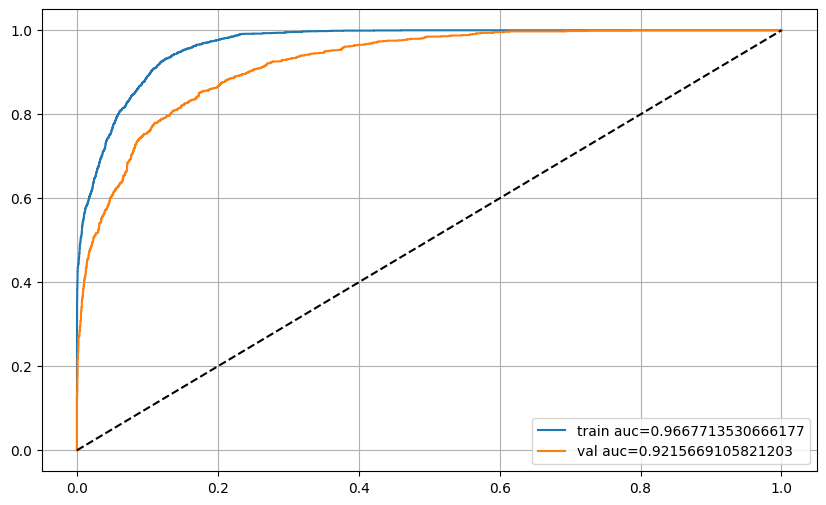

In [14]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train,dd)[:2], 
         label=f'train auc={score_train}')
plt.plot(*roc_curve(y_val, diagram)[:2],
         label=f'val auc={score_val}')


plt.plot([0,1], [0,1], '--', color='black')
plt.legend()
plt.grid()

In [15]:
accuracy_score(y_true=y_val,y_pred=forest.predict(x_val))

0.8620221669305587

Let's try to use gridsearchcv and see it's results

actually this task should be solved using just finding the best depth,buuuuuuut name me the reasons why not to try make it better)

In [16]:
from sklearn.model_selection import GridSearchCV
#in the tasks number of estimators needs to be 100 so we wont change this param
model = RandomForestClassifier(n_estimators=100)
params = {'criterion': ["entropy"], #gini was dropped
    'max_depth':np.arange(8,20,2),
    'min_samples_split':np.arange(5,14,2),
    'min_samples_leaf':np.arange(1,5,1)}
grid = GridSearchCV(model,params)

In [17]:
grid.fit(x_train,y_train)
validation = grid.predict_proba(x_val)
diagram = validation[:,1]
test_y_pred_forest = grid.predict_proba(x_train)
dd =  test_y_pred_forest[:,1]
score_train = (roc_auc_score(y_train,dd))
score_val = (roc_auc_score(y_val,diagram))

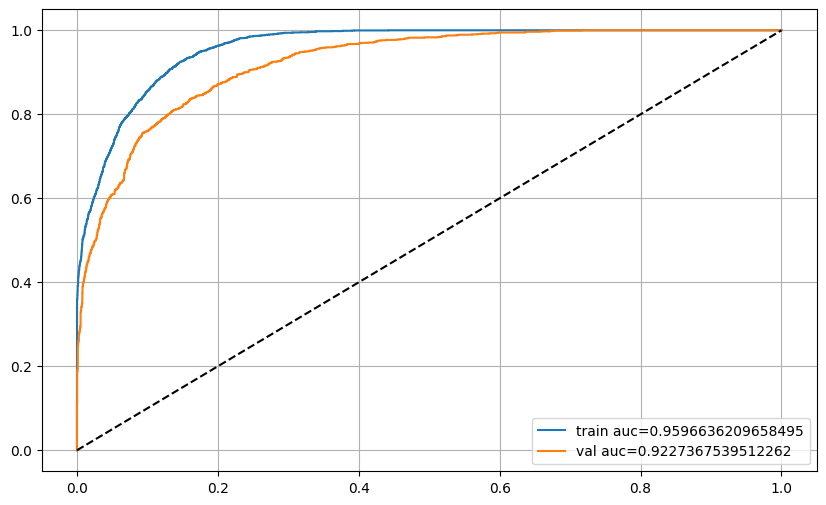

In [18]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train,dd)[:2], 
         label=f'train auc={score_train}')
plt.plot(*roc_curve(y_val, diagram)[:2],
         label=f'val auc={score_val}')


plt.plot([0,1], [0,1], '--', color='black')
plt.legend()
plt.grid()

In [19]:
grid.best_score_

0.857752569050656

In [20]:
best = grid.best_estimator_ #RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=9)
best

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_split=9)

In [21]:
accuracy_score(y_true=y_val,y_pred=grid.predict(x_val))

0.8627007464374576

In [22]:
x_test = pd.read_csv('data_scoring.csv')
x_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15
1,31,Private,265706,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40
2,61,Self-emp-not-inc,244087,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52
3,60,Local-gov,232618,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40
4,56,Private,34626,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,1980,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40
1542,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45
1543,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40
1544,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40


In [23]:
x_test.workclass = x_test.workclass.where(x_test.workclass != "?").fillna(np.nan)
x_test.occupation = x_test.occupation.where(x_test.occupation != "?").fillna(np.nan)
x_test.where(x_test == "?").count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [24]:
x_remake = pd.DataFrame(enc.transform(x_test[['workclass','education','marital-status','occupation','relationship','race','sex']]))
x_test = x_test.drop(['workclass','education','marital-status','occupation','relationship','race','sex'],axis= 1)
x_test = x_test.join(x_remake)
x_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,0,1,2,3,...,50,51,52,53,54,55,56,57,58,59
0,17,256173,6,0,0,15,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,31,265706,13,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,61,244087,9,0,0,52,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,60,232618,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,56,34626,10,0,1980,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,514716,13,0,0,40,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1542,32,207668,13,15024,0,45,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1543,27,104457,13,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1544,59,268700,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:
answer = grid.predict_proba(x_test.values)

In [26]:
answer

array([[1.        , 0.        ],
       [0.89187674, 0.10812326],
       [0.69981843, 0.30018157],
       ...,
       [0.96250777, 0.03749223],
       [0.76155807, 0.23844193],
       [0.10559215, 0.89440785]])

In [27]:
with open('scoring_y_pred_forest.txt', "w") as f:
    f.write(', '.join([str(item[1]) for item in answer]))

So we used bagging and this was quite good.

But lets try to use boosting

We will use catboost from yandex

In [28]:
from catboost import CatBoostClassifier, Pool, cv

First of all we should process our data once again

Because catboost is too smart, so we shouldnt fill nan values and do one-hot encoding!!!!

In [29]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,18,Private,395567,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,<=50K
14730,62,NaN,94931,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,3411,0,40,<=50K
14731,34,Private,261023,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1651,38,<=50K
14732,26,Private,195327,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,40,<=50K


In [56]:
x_cat_train = data.drop(['>50K,<=50K'],axis = 1)
x_cat_train
y_cat_train = data['>50K,<=50K']
y_cat_train

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4         >50K
         ...  
14729    <=50K
14730    <=50K
14731    <=50K
14732    <=50K
14733    <=50K
Name: >50K,<=50K, Length: 14734, dtype: object

In [58]:
x_cat_train = x_cat_train.fillna('NAN')
y_cat_train = y_cat_train.where(y_cat_train != "<=50K").fillna(0)
y_cat_train = y_cat_train.where(y_cat_train != ">50K").fillna(1)
y_cat_train

0        0
1        0
2        0
3        0
4        1
        ..
14729    0
14730    0
14731    0
14732    0
14733    0
Name: >50K,<=50K, Length: 14734, dtype: int64

In [59]:
x_cat_train,x_cat_val,y_cat_train,y_cat_val = train_test_split(x_cat_train,y_cat_train,shuffle=True,test_size=0.3)
 

In [60]:
cat_features = ['workclass','education','marital-status','occupation','relationship','race','sex']

In [61]:
train_dataset = Pool(data=x_cat_train, 
                     label=y_cat_train, 
                     cat_features=cat_features)

val_dataset = Pool(data=x_cat_val, 
                     label=y_cat_val, 
                     cat_features=cat_features)

In [62]:
depths = np.arange(3, 17,2)
boosting_metrics = []

for depth in depths:
    params = {"iterations": 100,
              "depth": depth,
              "loss_function": "Logloss",
              "custom_loss": "AUC",
              "verbose": False}

    scores = cv(train_dataset,params,fold_count=5)
    boosting_metrics.append(scores['test-AUC-mean'][99])
        
scores

Training on fold [0/5]

bestTest = 0.3266640875
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3333614507
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3250510217
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3337842053
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3307870066
bestIteration = 99

Training on fold [0/5]

bestTest = 0.3144728151
bestIteration = 99

Training on fold [1/5]

bestTest = 0.322877184
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3129715066
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3218651637
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3185801128
bestIteration = 99

Training on fold [0/5]

bestTest = 0.3094726876
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3167641158
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3089411009
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3173376573
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3149522993
b

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.671380,0.000361,0.671167,0.000345,0.816231,0.009438
1,1,0.649005,0.000305,0.647219,0.000584,0.845295,0.007002
2,2,0.633515,0.000437,0.631653,0.000523,0.845376,0.004733
3,3,0.611528,0.002675,0.608989,0.003656,0.862795,0.014880
4,4,0.589661,0.003704,0.586893,0.004371,0.877863,0.013052
...,...,...,...,...,...,...,...
95,95,0.315438,0.003572,0.231952,0.003882,0.911724,0.002387
96,96,0.315386,0.003623,0.231095,0.004209,0.911721,0.002409
97,97,0.315274,0.003530,0.230056,0.004074,0.911717,0.002345
98,98,0.314979,0.003614,0.229415,0.003797,0.911866,0.002356


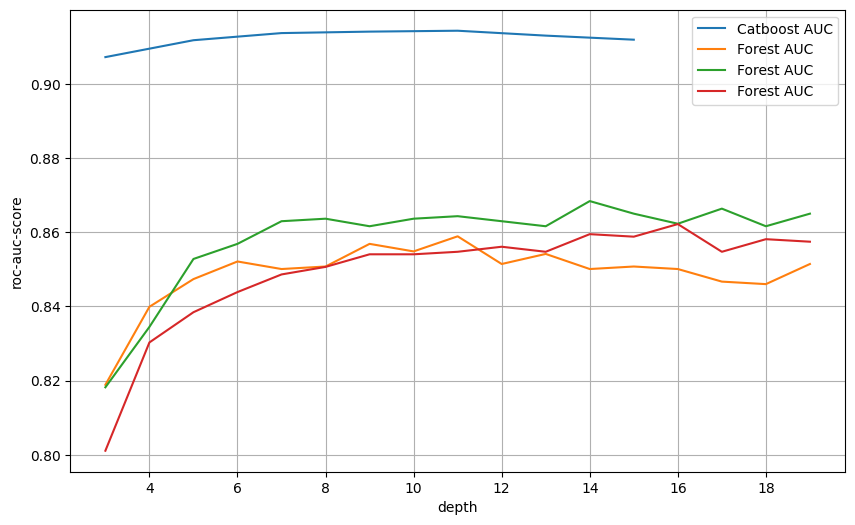

In [63]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 17,2), boosting_metrics, label='Catboost AUC')
plt.plot(np.arange(3, 20), depths_for_forest, label='Forest AUC')
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()
plt.legend()

Yep the diffrence is wow. (Ooooor i did something wrong.Who knows  ¯\\__(ツ)_/¯)

Let's pick depth 9

In [64]:
best_depth = 9

In [65]:
cat = CatBoostClassifier(500,loss_function='Logloss',verbose=False,depth = best_depth)

In [77]:
cat.fit(train_dataset)
on_train = cat.predict_proba(x_cat_train)
on_val = cat.predict_proba(x_cat_val)
on_train = on_train[:,1] 
on_val = on_val[:,1] 

In [78]:
train_auc = (roc_auc_score(y_cat_train,on_train))
test_auc =(roc_auc_score(y_cat_val,on_val))

In [79]:
assert test_auc > 0.915

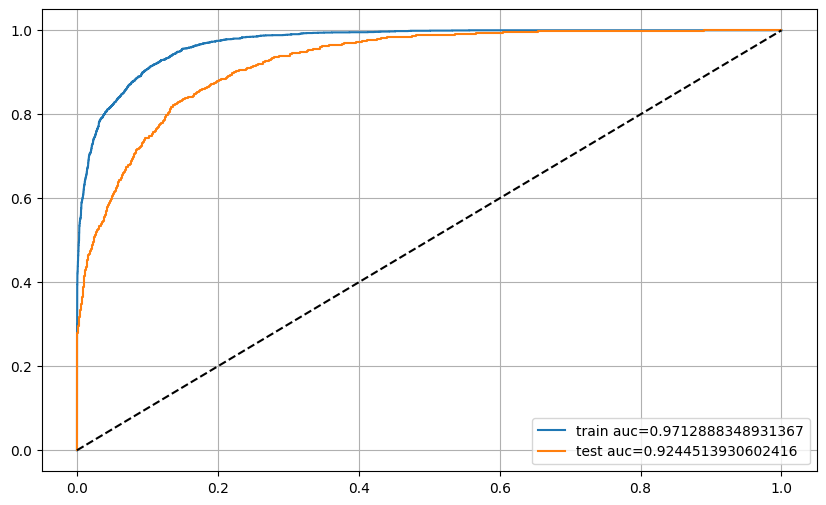

In [81]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_cat_train, on_train)[:2],label=f'train auc={train_auc}')
plt.plot(*roc_curve(y_cat_val, on_val)[:2],label=f'test auc={test_auc}')

plt.plot([0,1], [0,1], '--', color='black')

plt.legend()
plt.grid()

In [82]:
x_cat_test = pd.read_csv('data_scoring.csv')
x_cat_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15
1,31,Private,265706,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40
2,61,Self-emp-not-inc,244087,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52
3,60,Local-gov,232618,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40
4,56,Private,34626,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,1980,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40
1542,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45
1543,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40
1544,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40


In [84]:
x_cat_test.workclass = x_cat_test.workclass.where(x_cat_test.workclass != "?").fillna('NAN')
x_cat_test.occupation = x_cat_test.occupation.where(x_cat_test.occupation != "?").fillna('NAN')

In [85]:
answer_for_boost = cat.predict_proba(x_cat_test)

In [86]:
with open('scoring_y_pred_boost.txt', "w") as f:
    f.write(', '.join([str(item[1]) for item in answer_for_boost]))

All tests are passed

This is was my first exp. with catboost and this library is amazing.

It makes life and work much faster and easier.